<a href="https://colab.research.google.com/github/malejavanegas0/Proyecto/blob/main/Proyecto_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Body signal of smoking** 🚭

***Elaborado por: Daniela Forero Cárdenas, David Mendez Medellin y María Alejandra Vanegas***

Total Registros:


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kukuroo3/body-signal-of-smoking")

print("Path to dataset files:", path)

100%|██████████| 3.40M/3.40M [00:00<00:00, 125MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/kukuroo3/body-signal-of-smoking/versions/2


In [4]:
import os
import zipfile
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot


In [5]:
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/root/.cache/kagglehub/datasets/kukuroo3/body-signal-of-smoking/versions/2/smoking.csv
/root/.cache/kagglehub/datasets/kukuroo3/body-signal-of-smoking/versions/2/competition_format/y_test.csv
/root/.cache/kagglehub/datasets/kukuroo3/body-signal-of-smoking/versions/2/competition_format/x_train.csv
/root/.cache/kagglehub/datasets/kukuroo3/body-signal-of-smoking/versions/2/competition_format/y_train.csv
/root/.cache/kagglehub/datasets/kukuroo3/body-signal-of-smoking/versions/2/competition_format/x_test.csv


In [6]:
import pandas as pd
file_path = os.path.join(path, "smoking.csv")
df = pd.read_csv(file_path)
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [7]:
import shutil
shutil.copytree(path, "/content/drive/MyDrive/Machine_Learning/Proyecto_clase", dirs_exist_ok=True)

'/content/drive/MyDrive/Machine_Learning/Proyecto_clase'

In [8]:
print("--- Información del DataFrame ---")
df.info()

--- Información del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HD

In [9]:
df.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,16077.039933,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13922.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27845.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41768.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [10]:
df.isnull().sum()

,0
ID,0
gender,0
age,0
height(cm),0
weight(kg),0
waist(cm),0
eyesight(left),0
eyesight(right),0
hearing(left),0
hearing(right),0


In [11]:
df = df.drop(["ID","oral"], axis=1) # eliminamos ID y oral

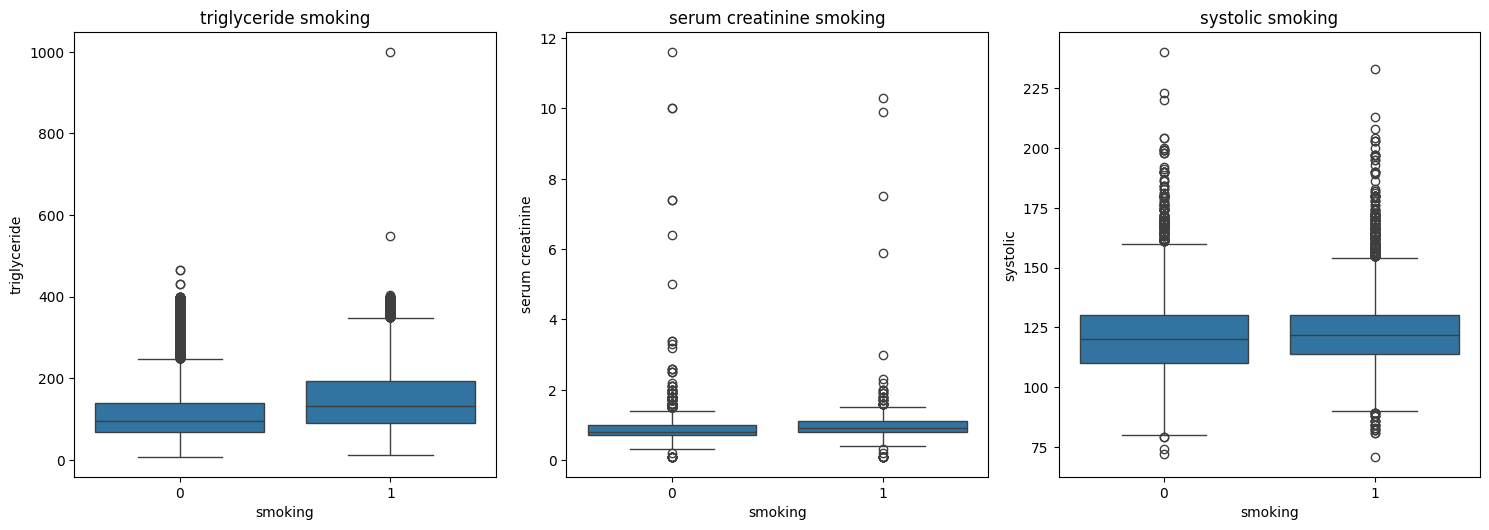

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
variables = ['triglyceride', 'serum creatinine', 'systolic']
plt.figure(figsize=(15, 10))
for i, variable in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='smoking', y=variable, data=df)
    plt.title(f'{variable} smoking')
plt.tight_layout()
plt.show()

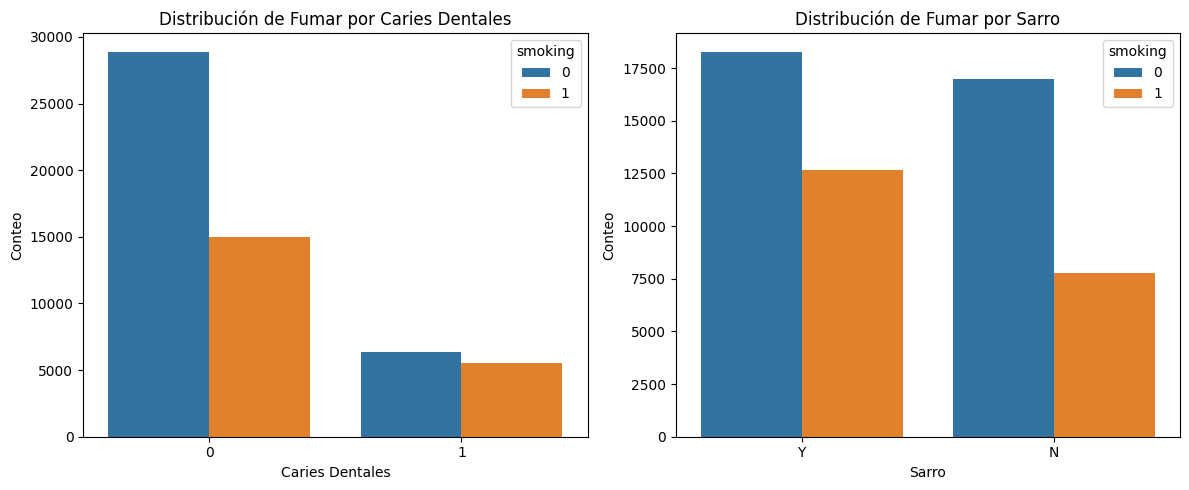

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='dental caries', hue='smoking', data=df, ax=axes[0])
axes[0].set_title('Distribución de Fumar por Caries Dentales')
axes[0].set_xlabel('Caries Dentales')
axes[0].set_ylabel('Conteo')

sns.countplot(x='tartar', hue='smoking', data=df, ax=axes[1])
axes[1].set_title('Distribución de Fumar por Sarro')
axes[1].set_xlabel('Sarro')
axes[1].set_ylabel('Conteo')

plt.tight_layout()
plt.show()

In [14]:

cat_features = ["gender","tartar"]
df = pd.get_dummies(df, columns=cat_features)


In [15]:
# Convertir a dummy (genero, sarro)
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,serum creatinine,AST,ALT,Gtp,dental caries,smoking,gender_F,gender_M,tartar_N,tartar_Y
0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,...,0.7,18.0,19.0,27.0,0,0,1,0,0,1
1,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,...,0.6,22.0,19.0,18.0,0,0,1,0,0,1
2,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,...,1.0,21.0,16.0,22.0,0,1,0,1,1,0
3,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,...,1.0,19.0,26.0,18.0,0,0,0,1,0,1
4,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,...,0.6,16.0,14.0,22.0,0,0,1,0,1,0


In [16]:
print("Shape:", df.shape)
print("Número de filas:", df.shape[0])
print("Número de columnas:", df.shape[1])

Shape: (55692, 27)
Número de filas: 55692
Número de columnas: 27


In [17]:
scaler = StandardScaler()

2.BALANCEO DE LA DATA

In [18]:
smoking_distribution = df['smoking'].value_counts()
print("Distribución de la variable 'smoking':")
print(smoking_distribution)

Distribución de la variable 'smoking':
smoking
0    35237
1    20455
Name: count, dtype: int64


In [19]:
X = df.drop('smoking', axis=1)
y = df['smoking']
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (55692, 26)
Shape of y: (55692,)


In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Distribución de la variable 'smoking' después de SMOTE:")
print(y_resampled.value_counts())

Distribución de la variable 'smoking' después de SMOTE:
smoking
0    35237
1    35237
Name: count, dtype: int64


3.PREPARACIÓN DE LOS DATOS

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

5.SELECCIÓN DE VARIABLES NUMÉRICAS

In [22]:
X_train.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,gender_F,gender_M,tartar_N,tartar_Y
29276,45,155,60,83.800000,0.600000,1.000000,2.0,1.0,118.000000,78.000000,...,1.0,0.600000,27.000000,6.000000,23.000000,0,1,0,0,1
12808,50,155,50,71.000000,1.000000,1.200000,1.0,1.0,130.000000,85.000000,...,2.0,0.700000,24.000000,22.000000,22.000000,0,1,0,1,0
28316,25,160,60,76.500000,1.200000,1.200000,1.0,1.0,139.000000,86.000000,...,1.0,1.100000,24.000000,27.000000,34.000000,1,0,1,0,1
66005,72,165,69,89.962882,1.139109,1.357921,1.0,1.0,111.405939,61.014847,...,1.0,1.021782,27.594061,18.579214,26.564367,0,0,1,0,0
30163,20,175,80,86.000000,0.700000,0.200000,1.0,1.0,140.000000,79.000000,...,1.0,0.900000,17.000000,25.000000,26.000000,0,0,1,0,1


In [23]:

# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (56379, 26) (56379,)
Test (14095, 26) (14095,)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import f_classif # Using f_classif as an example, you can also use mutual_info_classif
from sklearn.linear_model import LogisticRegression

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the pipeline to evaluate
model = LogisticRegression(solver='liblinear') # You can add max_iter here if needed
fs = SelectKBest(score_func=f_classif) # Choose your desired score_func

pipeline = Pipeline(steps=[('anova',fs), ('lr', model)]) # Name the steps appropriately

# define the grid of hyperparameters to search
grid = dict()
grid['anova__k'] = [i+1 for i in range(X_train.shape[1])] # Search over possible values of k

# define the grid search
search = GridSearchCV(pipeline, grid, scoring='accuracy', n_jobs=-1, cv=cv)

# perform the search
results = search.fit(X_train, y_train) # Fit on the training data

# summarize best
print('Best Mean Accuracy: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

Best Mean Accuracy: 0.776
Best Config: {'anova__k': 18}


In [22]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
import numpy as np

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the pipeline to evaluate
model = LogisticRegression(solver='liblinear')

# usar información mutua
fs = SelectKBest(score_func=mutual_info_classif)

pipeline = Pipeline(steps=[('mutual', fs), ('lr', model)])

# define the grid
grid = dict()
grid['mutual__k'] = list(range(1, X.shape[1] + 1))  # probar todos los k

# define the grid search
search = GridSearchCV(pipeline, grid, scoring='accuracy', n_jobs=-1, cv=cv)

# perform the search
results = search.fit(X, y)

# summarize best
print('Best Mean Accuracy: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)


Best Mean Accuracy: 0.746
Best Config: {'mutual__k': 23}


prueba F de ANOVA

Feature 0: 1961.234733
Feature 1: 12553.973545
Feature 2: 6147.352925
Feature 3: 3385.020073
Feature 4: 249.082355
Feature 5: 274.101160
Feature 6: 45.161682
Feature 7: 28.798951
Feature 8: 279.747248
Feature 9: 722.192610
Feature 10: 566.477715
Feature 11: 53.153772
Feature 12: 3812.443723
Feature 13: 2230.242281
Feature 14: 99.495793
Feature 15: 13350.622976
Feature 16: 5.289060
Feature 17: 3499.968413
Feature 18: 173.491098
Feature 19: 550.767364
Feature 20: 2987.596967
Feature 21: 14.399867
Feature 22: 27865.703278
Feature 23: 24235.259861
Feature 24: 2386.804494
Feature 25: 4.137883


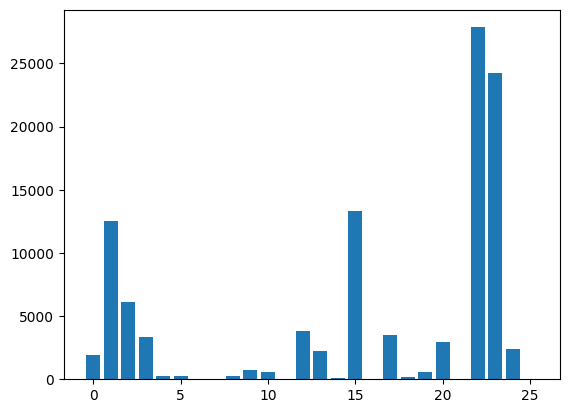

In [24]:
from sklearn.feature_selection import f_classif, SelectKBest
from matplotlib import pyplot

# define feature selection function
def select_features(X_train, y_train, X_test, score_func, k):
    # configure to select all features
    fs = SelectKBest(score_func=score_func, k=18)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, f_classif, 'all')

# what are scores for the features
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))

# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Selección de funciones de información mutua

Feature 0: 0.105787
Feature 1: 0.187094
Feature 2: 0.139877
Feature 3: 0.165293
Feature 4: 0.135019
Feature 5: 0.134099
Feature 6: 0.012890
Feature 7: 0.009762
Feature 8: 0.147996
Feature 9: 0.147780
Feature 10: 0.151906
Feature 11: 0.143757
Feature 12: 0.173297
Feature 13: 0.161722
Feature 14: 0.147199
Feature 15: 0.233817
Feature 16: 0.020252
Feature 17: 0.166974
Feature 18: 0.144865
Feature 19: 0.163743
Feature 20: 0.208472
Feature 21: 0.001110
Feature 22: 0.193556
Feature 23: 0.176203
Feature 24: 0.021023
Feature 25: 0.000000


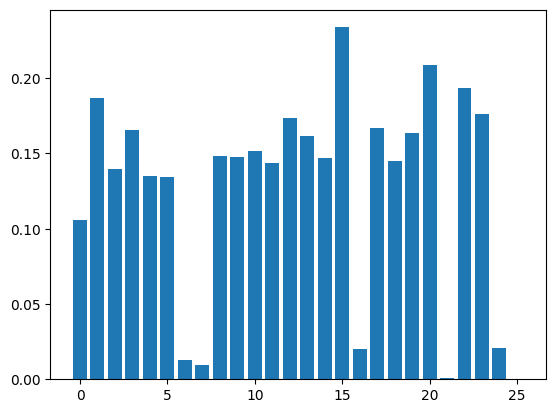

In [25]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from matplotlib import pyplot

# define feature selection function (reusing the previous one)
def select_features(X_train, y_train, X_test, score_func, k):
    # configure to select all features
    fs = SelectKBest(score_func=score_func, k=23)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs


# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, mutual_info_classif, 'all')

# what are scores for the features
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))

# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Modelado con características seleccionadas

In [26]:
# fit the model
model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

# evaluate the model
yhat = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 77.83


Modelo construido utilizando características de la prueba F de ANOVA

In [27]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, f_classif, 18)

# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)

# evaluate the model
yhat = model.predict(X_test_fs)

# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 77.50


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Modelo construido utilizando características de información mutua

In [28]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, mutual_info_classif, 23)

# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)

# evaluate the model
yhat = model.predict(X_test_fs)

# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 77.57


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Ajuste el número de funciones seleccionadas

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the pipeline to evaluate
model = LogisticRegression(solver='liblinear')

fs = SelectKBest(score_func=f_classif)

pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])

# define the grid
grid = dict()
grid['anova__k'] = [i+1 for i in range(X.shape[1])]

# define the grid search
search = GridSearchCV(pipeline, grid, scoring='accuracy', n_jobs=-1, cv=cv)

# perform the search
results = search.fit(X, y)

# summarize best
print('Best Mean Accuracy: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

Best Mean Accuracy: 0.746
Best Config: {'anova__k': 18}


In [31]:
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

# evaluate a given model using cross-validation
def evaluate_model(model):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  return scores

>1 0.701 (0.005)
>2 0.701 (0.005)
>3 0.702 (0.005)
>4 0.703 (0.005)
>5 0.704 (0.005)
>6 0.726 (0.005)
>7 0.734 (0.005)
>8 0.735 (0.005)
>9 0.738 (0.005)
>10 0.739 (0.005)
>11 0.736 (0.006)
>12 0.738 (0.006)
>13 0.740 (0.006)
>14 0.740 (0.005)
>15 0.742 (0.007)
>16 0.743 (0.007)
>17 0.744 (0.006)
>18 0.746 (0.006)


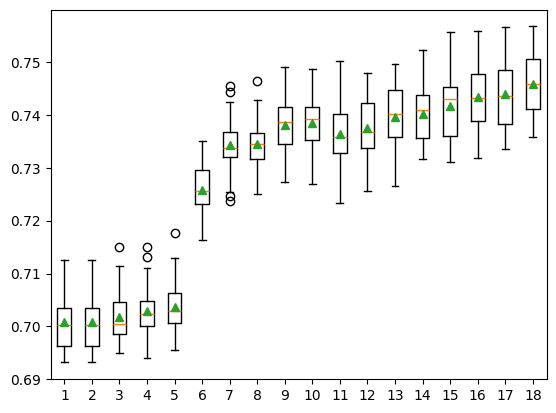

In [35]:
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

# evaluate a given model using cross-validation
def evaluate_model(model):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  return scores

# define number of features to evaluate
num_features = [i+1 for i in range(18)] # Changed to iterate up to 18 features

# enumerate each number of features
results = list()

for k in num_features:
  # create pipeline
  model = LogisticRegression(solver='liblinear')
  fs = SelectKBest(score_func=f_classif, k=k)
  pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
  # evaluate the model
  scores = evaluate_model(pipeline)
  results.append(scores)
  # summarize the results
  print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, tick_labels=num_features, showmeans=True)
pyplot.show()

In [36]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select the top 18 features based on f_classif scores
selector = SelectKBest(score_func=f_classif, k=18)
X_selected = selector.fit_transform(X, y)

# Get the names of the selected features
selected_features_mask = selector.get_support()
selected_feature_names = X.columns[selected_features_mask]

# Create a new DataFrame with the selected features
X_selected_df = pd.DataFrame(X_selected, columns=selected_feature_names)

print("Data set", X_selected_df.shape)
display(X_selected_df.head())

Data set (55692, 18)


,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,triglyceride,HDL,hemoglobin,serum creatinine,ALT,Gtp,dental caries,gender_F,gender_M,tartar_N,tartar_Y
0,40.0,155.0,60.0,81.3,114.0,73.0,94.0,82.0,73.0,12.9,0.7,19.0,27.0,0.0,1.0,0.0,0.0,1.0
1,40.0,160.0,60.0,81.0,119.0,70.0,130.0,115.0,42.0,12.7,0.6,19.0,18.0,0.0,1.0,0.0,0.0,1.0
2,55.0,170.0,60.0,80.0,138.0,86.0,89.0,182.0,55.0,15.8,1.0,16.0,22.0,0.0,0.0,1.0,1.0,0.0
3,40.0,165.0,70.0,88.0,100.0,60.0,96.0,254.0,45.0,14.7,1.0,26.0,18.0,0.0,0.0,1.0,0.0,1.0
4,40.0,155.0,60.0,86.0,120.0,74.0,80.0,74.0,62.0,12.5,0.6,14.0,22.0,0.0,1.0,0.0,1.0,0.0


PCA

In [37]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=25, n_informative=20, n_redundant=5, random_state=7)
    return X, y


In [38]:
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,21):
        steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
        models[str(i)] = Pipeline(steps=steps)
    return models

In [39]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

>1 0.559 (0.050)
>2 0.553 (0.049)
>3 0.697 (0.040)
>4 0.696 (0.042)
>5 0.697 (0.043)
>6 0.697 (0.035)
>7 0.708 (0.040)
>8 0.726 (0.034)
>9 0.745 (0.037)
>10 0.760 (0.044)
>11 0.775 (0.042)
>12 0.781 (0.040)
>13 0.819 (0.044)
>14 0.824 (0.043)
>15 0.835 (0.046)
>16 0.835 (0.047)
>17 0.845 (0.038)
>18 0.848 (0.034)
>19 0.848 (0.033)
>20 0.850 (0.035)


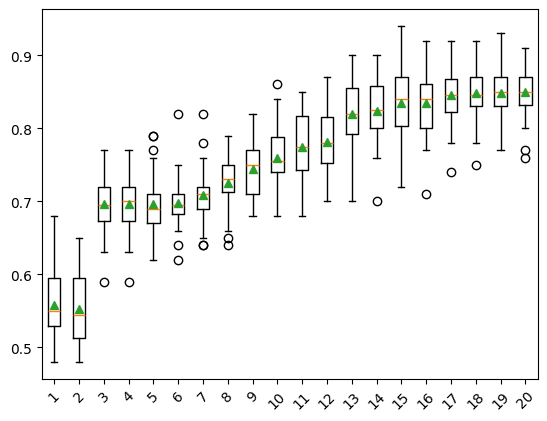

In [40]:
# define dataset
X, y = get_dataset()

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, tick_labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

In [41]:
# define dataset
# X, y = make_classification(n_samples=1000, n_features=25, n_informative=20, n_redundant=5, random_state=7) # Commented out synthetic data generation

# define the model
steps = [('pca', PCA(n_components=15)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)

# fit the model on the whole dataset
model.fit(X, y)

# Extract the PCA step from the pipeline
pca_step = model.named_steps['pca']

# Transform the original data using the fitted PCA
X_pca_transformed = pca_step.transform(X)

# Create a DataFrame from the transformed data for better readability
pca_columns = [f'Principal_Component_{i+1}' for i in range(X_pca_transformed.shape[1])]
X_pca_transformed_df = pd.DataFrame(X_pca_transformed, columns=pca_columns)

print("Shape of the transformed dataset:", X_pca_transformed_df.shape)
display(X_pca_transformed_df.head())

Shape of the transformed dataset: (1000, 15)


,Principal_Component_1,Principal_Component_2,Principal_Component_3,Principal_Component_4,Principal_Component_5,Principal_Component_6,Principal_Component_7,Principal_Component_8,Principal_Component_9,Principal_Component_10,Principal_Component_11,Principal_Component_12,Principal_Component_13,Principal_Component_14,Principal_Component_15
0,7.447383,5.225017,3.394103,-4.335691,-4.723021,0.851496,-1.021459,-1.079379,0.006513,3.285098,1.779577,2.651666,1.200453,-2.255046,1.331864
1,1.132789,3.743614,-4.265306,-1.368819,0.584129,-0.838404,-7.267110,1.813510,4.098222,-0.543336,-2.582204,2.411747,0.697991,2.359483,-0.757457
2,17.903068,-5.622016,4.367381,2.033074,-9.545644,-2.019955,-1.004110,-0.465711,6.253401,-0.213557,-0.861868,-4.277319,1.646922,-3.104997,-0.271409
3,7.692886,2.398021,10.762700,4.526871,1.204072,-4.574010,0.142195,2.287905,-5.371350,0.960755,1.990935,-1.319624,-2.583412,0.690491,-0.301625
4,4.699786,-0.270384,12.047711,6.440387,4.840197,1.392498,0.488751,5.041626,-6.428957,-0.271573,1.681714,-2.504125,-2.046622,3.468594,0.707908
